In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

np.random.seed(42)

# Data

In [2]:
train_data_dir = "chest_xray/train"
test_data_dir = "chest_xray/test"
val_data_dir = "chest_xray/val"

# data normalization
idg = ImageDataGenerator(rescale=1./255)

train_generator = idg.flow_from_directory(train_data_dir, color_mode = 'grayscale',
                                          target_size =(224, 224),
                                          batch_size = 32,
                                          class_mode = 'binary')
test_generator = idg.flow_from_directory(test_data_dir, color_mode = 'grayscale',
                                        target_size =(224,224),
                                        batch_size = 32,
                                        class_mode = 'binary')
valid_generator = idg.flow_from_directory(val_data_dir, color_mode = 'grayscale',
                                         target_size = (224, 224),
                                         batch_size = 32,
                                         class_mode = 'binary')

# Create the datasets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [3]:
print(train_images.shape)
test_images.shape

(32, 224, 224, 1)


(32, 224, 224, 1)

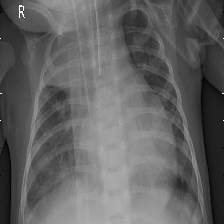

In [4]:
# Preview of an image
array_to_img(train_images[5])

In [5]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

# Models

##### model 1

In [6]:
np.random.seed(42)
model_1 = Sequential()

model_1.add(Conv2D(32,1, activation = 'relu', input_shape = (224, 224, 1)))
model_1.add(MaxPool2D(pool_size = 2))
model_1.add(Conv2D(32, 1, activation = 'relu'))
model_1.add(MaxPool2D(pool_size = 3))
model_1.add(Flatten())
model_1.add(Dense(100, activation = 'relu'))
model_1.add(Dense(1, activation='sigmoid'))

In [7]:
print(model_1.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      1056      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 43808)             0         
_________________________________________________________________
dense (Dense)                (None, 100)               4380900   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [8]:
model_1.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [9]:
callback = EarlyStopping(monitor='val_loss', patience=5, min_delta=3)

In [10]:
np.random.seed(42)
results_1 =model_1.fit(train_generator, validation_data=valid_generator, epochs=3, batch_size=32, callbacks=callback)

Epoch 1/3
163/163 [==============================] - 68s 416ms/step - loss: 0.4809 - accuracy: 0.7960 - val_loss: 0.4296 - val_accuracy: 0.7500
Epoch 2/3
163/163 [==============================] - 62s 382ms/step - loss: 0.1357 - accuracy: 0.9425 - val_loss: 0.5372 - val_accuracy: 0.6875
Epoch 3/3
163/163 [==============================] - 63s 383ms/step - loss: 0.1038 - accuracy: 0.9624 - val_loss: 0.2182 - val_accuracy: 0.9375


In [11]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

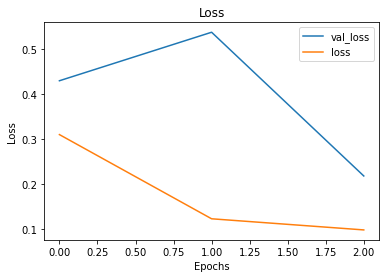

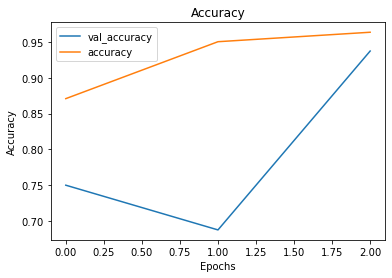

In [12]:
visualize_training_results(results_1)

In [13]:
predictions_1 = model_1.predict([test_images])

In [14]:
print(np.argmax(predictions_1[0]))

0


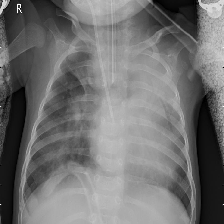

In [15]:
array_to_img(test_images[0])

##### model 2

In [16]:
np.random.seed(42)
model_2 = Sequential()

model_2.add(Conv2D(64,1, activation = 'relu', input_shape = (224, 224, 1)))
model_2.add(MaxPool2D(pool_size = 2))
model_2.add(Conv2D(64, 1, activation = 'relu'))
model_2.add(MaxPool2D(pool_size = 3))
model_2.add(Flatten())
model_2.add(Dense(100, activation = 'relu'))
model_2.add(Dense(1, activation='sigmoid'))

model_2.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = ['accuracy'])
results_2 =model_2.fit(train_generator, validation_data=valid_generator, epochs=3, batch_size=32, callbacks=callback)

Epoch 1/3
163/163 [==============================] - 101s 613ms/step - loss: 0.4868 - accuracy: 0.7889 - val_loss: 0.5190 - val_accuracy: 0.7500
Epoch 2/3
163/163 [==============================] - 99s 605ms/step - loss: 0.1182 - accuracy: 0.9594 - val_loss: 0.2064 - val_accuracy: 0.9375
Epoch 3/3
163/163 [==============================] - 99s 607ms/step - loss: 0.0907 - accuracy: 0.9672 - val_loss: 0.5329 - val_accuracy: 0.7500


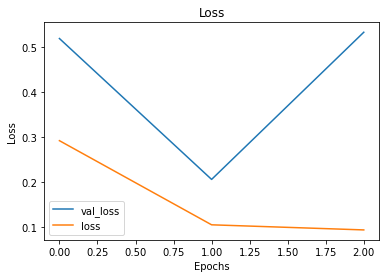

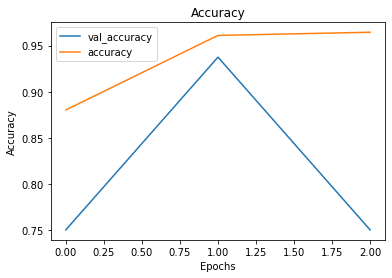

In [17]:
visualize_training_results(results_2)

##### model 3

In [18]:
np.random.seed(42)
model_3 = Sequential()

model_3.add(Conv2D(64,1, activation = 'relu', input_shape = (224, 224, 1)))
model_3.add(MaxPool2D(pool_size = 2))
model_3.add(Conv2D(64, 1, activation = 'relu'))
model_3.add(MaxPool2D(pool_size = 3))
model_3.add(Conv2D(64, 1, activation = 'relu'))
model_3.add(MaxPool2D(pool_size = 3))
model_3.add(Flatten())
model_3.add(Dense(100, activation = 'relu'))
model_3.add(Dense(1, activation='sigmoid'))

model_3.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = ['accuracy'])
results_3 =model_3.fit(train_generator, validation_data=valid_generator, epochs=3, batch_size=32, callbacks=callback)

Epoch 1/3
163/163 [==============================] - 98s 598ms/step - loss: 0.4538 - accuracy: 0.7817 - val_loss: 1.0108 - val_accuracy: 0.6250
Epoch 2/3
163/163 [==============================] - 95s 583ms/step - loss: 0.1221 - accuracy: 0.9536 - val_loss: 0.5221 - val_accuracy: 0.8125
Epoch 3/3
163/163 [==============================] - 97s 593ms/step - loss: 0.1023 - accuracy: 0.9624 - val_loss: 0.5888 - val_accuracy: 0.8125


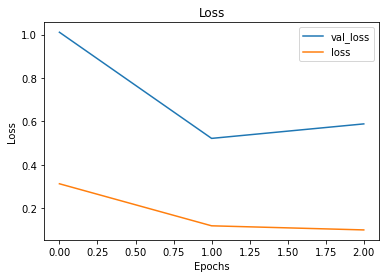

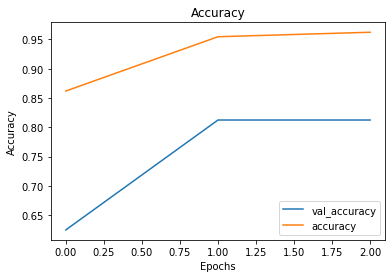

In [19]:
visualize_training_results(results_3)

# Model Evaluations

In [20]:
model_1.evaluate(test_generator)

20/20 [==============================] - 5s 254ms/step - loss: 0.4802 - accuracy: 0.8237


[0.48015671968460083, 0.8237179517745972]

In [21]:
model_2.evaluate(test_generator)

20/20 [==============================] - 6s 323ms/step - loss: 0.8436 - accuracy: 0.7420


[0.8436297178268433, 0.7419871687889099]

In [22]:
model_3.evaluate(test_generator)

20/20 [==============================] - 7s 328ms/step - loss: 0.7074 - accuracy: 0.7885


[0.7074064016342163, 0.7884615659713745]

In [23]:
# how do I eveluate the wrong classifications to try to figure out why these were misclassified
#why do my results keep changing

# Best Model Tuning